<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Berlín Isabel Preciado Escalera y Andrea Flores

**Fecha:** 12 de octubre del 2021

**Expediente** :723259 

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/berlinpreciado21/ProyectoConjunto_BIPreciado_AFlores

# Tarea 5
    

   
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>



In [1]:
#Librerías:
###Se importan librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy

>Despeje de F(x) para conocer x e igualando a u (inversa):
>$$ u = F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x) = \sin^{-1}(\sqrt x)= \frac{\pi u}{2} \sqrt x = \sin(\frac{\pi u}{2})$$ 
$$\sin^{-1}(\sqrt x)= \sin(\frac{\pi u}{2})$$
entonces $$x = \sin^{2}(\frac{\pi u}{2})$$ que fue lo utilizado en la función movimiento Browniano.
>Como cuando se tiene la función $f(x)$ y requerimos calcular F(x) se integra entonces se hace lo opuesto que es derivar, para conocer f(x) a partir de $F(x)$:
> $$f(x) = \frac{d}{dx}(\frac{2}{\pi}\sin^{-1}(\sqrt x))=\frac{2}{\pi} \frac{d}{dx}(\sin^{-1}(\sqrt x))=\frac{d}{dx}(\frac{2}{\pi}\sin^{-1}(\sqrt x))$$ 
>Respuesta para f(x) : $$f(x)=\frac{1}{\pi\sqrt{1-x}\sqrt{x}}$$


## Estudiante Berlin

In [2]:
### Está función retorna la función de distribución acumulada
def D_browniano(N:"Número de muestras"):
    "Inversa de la función de distribución F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$"
    return np.sin((np.random.rand(N)*np.pi)/2)**2###Hacemos la función inversa
f_x = lambda x: 1/(np.pi*np.sqrt(1-x)*np.sqrt(x))###Función de distribución f(x) obtenida de la derivada planteada

0.5106936141109951


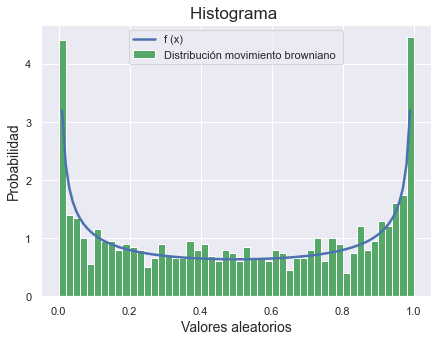

In [3]:
N = 1000 ###Número de aleatorios que se pasaran por argumento a la función de distribución acumulada
x = D_browniano(N) ###Se llama a la función
x_ = np.arange(0.01,1,0.01)###Se crea un vector que se pasará por argumento de la función de distribución f(x)
###Se hace el histograma y se plotea la función de distribución como comparación
plt.figure(figsize=[7,5])
plt.hist(x,bins=50,density=True,color='g',label='Distribución movimiento browniano ')
plt.plot(x_,f_x(x_),color='b',lw=2.5,label="f (x)")
plt.xlabel('Valores aleatorios',fontsize=14)
plt.ylabel('Probabilidad',fontsize=14)
plt.title('Histograma ', fontsize=17)
plt.legend();
print(np.mean(x))
plt.show()

## Estudiante Andrea

In [4]:
def distribucion(N):
    x = np.zeros(N)
    def browniano(i):
        nonlocal x
        x[i] = np.sin((np.pi / 2) * np.random.random()) ** 2    
    [browniano(i) for i in range(N)]
    i= np.arange(0.001,1,0.001)
    y = 1 / (np.pi * (i ** (1/2)) * np.sqrt(1 - i)) # derivada 
    plt.hist(x, bins = 100, density = True)
    plt.plot(i, y, color = 'orange', linewidth = 3)
    plt.show();

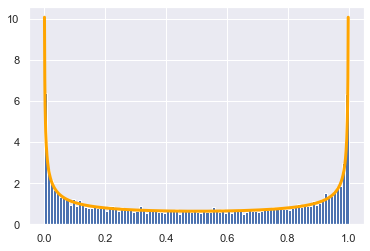

In [5]:
distribucion(10000)

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).

## Estudiante Berlin

In [6]:
###Se hace una función de distribución acumulada
def d_binomial(n:"Parámetro n",p:"Parametro p"):
    "Está función genera la distribución binomial acumulada"
    vector = np.zeros(n) 
    vector[0] = (1-p)**n 
    def llenar_vector(i): 
        nonlocal vector 
        vector[i+1] = ((n-i)/(i+1))*((p)/(1-p))*vector[i] 

    [llenar_vector(i) for i in range(n-1)] 
    return np.cumsum(vector)

In [7]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       N: 'cantidad de números aleatorios a generar'):
    "Genera una distribución discreta a partir de una distribución acumulada"
    U =np.random.rand(N)
    v = [sum([1 for p in p_acum if p < ui ])  for ui in U]
    return v
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y,label=label)
    plt.legend()
    plt.show()

<Figure size 576x432 with 0 Axes>

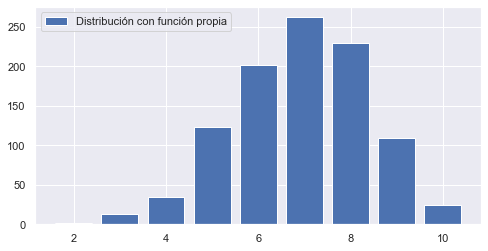

In [8]:
n,p = 10 ,0.7
p_acum = d_binomial(n,p)
N = 1000 
distribucion = Gen_distr_discreta(p_acum,N) 
plt.figure(figsize=[8,6])
plot_histogram_discrete(distribucion,"Distribución con función propia")

## Estudiante Andrea

In [9]:
def generador(proba: 'Probabiliad Acumulada de la distribución a generar',
              indices: 'Valores reales a generar de forma aleatoriamente',
              N: 'Cantidad de# aleatorios'):
    U = np.random.rand(N)
    reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in proba if p < ui]) for ui in U]).map(reales)
    return y

In [10]:
def histograma(distribucion:'señal de variables aleatorias de un distribución DISCRETA dada'):
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=True) 
    #len(set) muestro # valores diferentes en una distribución
    plt.bar(x[1:], y)
    plt.show()

In [11]:
def probabinom(n, p):
    proba = np.zeros(n)
    proba[0] = (1 - p)**n
    def pb(i):
        nonlocal proba
        c  = p / (1 - p)
        proba[i + 1] = (c * (n - i) / (i + 1)) * proba[i]
        
    [pb(i) for i in range(n - 1)]
    
    return np.cumsum(proba)

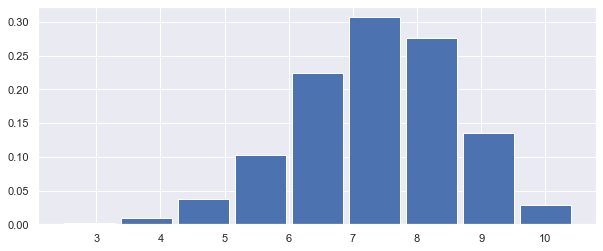

In [12]:
proba_db = probabinom(10, 0.7)
dist_binom = generador(proba_db, np.arange(0, 10 + 1), 1000)
histograma(dist_binom)